# <div align="center"> Presentation of different results obtained in our study

 The goal of this notebook is to:
 
 * Present the different results obtained from each classifier used
 * Compare the different classifiers in term of Accuracy using tables and boxplot
 * Compare the different features extraction methods using boxplot

## Part 1: Reminder

### 1.1. About the Dataset

* The original dataset, as it was uploaded, consists of 5 different folders.

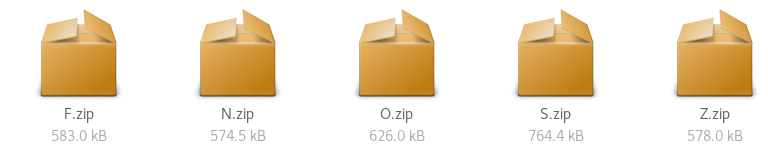

In [1]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/figures/Raw_folders.png',width=600)

* Each folder contains 100 files

* Each file in the folder represents data about a single subject/person. 

* The content of eachfile is a recording of brain activity for 23.6 seconds, 

* Only one folder contains the positive class

For our study, we built two data set with this original dataset

* The first dataset was an **unbalanced dataset** with 0.2 as the prevalence of positive class

* The second dataset was **a balanced dataset** with 0.5 as the prevalence of positive class. 
To build it we pick randomly 25 patients in the four folders that contained the negative class and all the patients in the folder that contained the positive class.


### 1.2. About the features extraction methods

We have implemented 4 features extractions methods namely:
* Discrete wavelet transform Dwt-db4,

* Discrete wavelet transform Dwt-db2,

* Discrete wavelet transform Dwt-coif1, 

* Mel frequency ceptral coeficient Mfcc.

### 1.3. About the Machine learning classifiers

For the classifiers we have implemented seven classifiers namely:

   * Linear discriminant analysis(LDA),
    
   * Quadratic discriminant analysis(QDA),
    
   * K-nearest neigbor(KNN),
    
   * Naives Baye(NB),
    
   * Random forest(RF),
    
   * Gradient boosting (GB),
    
   * Suport vector machine (SVM).

## Part 2 : Implementation Results of different methods

### 2.1.Results without features extraction

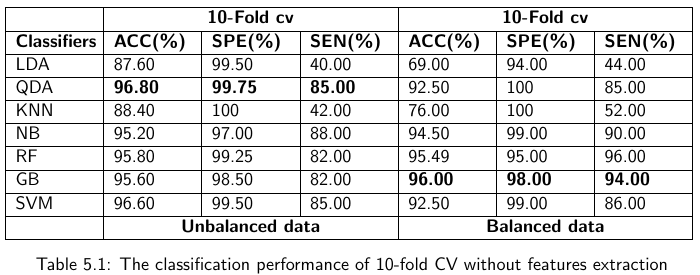

In [2]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/Table/wfe.png',width=700)

QDA performed best with 96.80% of accuracy, 99.75% of specificity and 85% of sensitivity in the unbalanced dataset when GB performed best with 96.00% of accuracy, 98.00% of specificity and 94% of sensitivity in the balanced dataset

### 2.2.Results with features extraction by wavelet db4

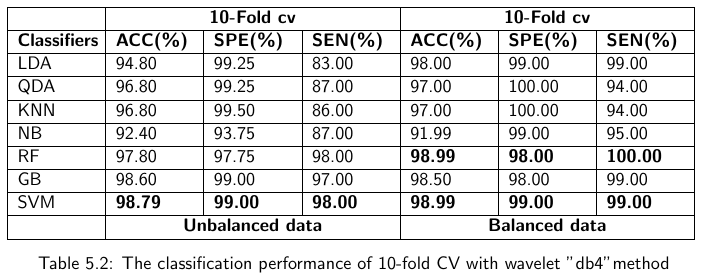

In [3]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/Table/db4.png',width=700)

SVM performed best with 98.79% of accuracy, 99.00% of specificity and 98% of sensitivity in the unbalanced dataset when GB and SVM performed best with 98.99% of accuracy, 99.00% of specificity and 99% of sensitivity in the balanced dataset

### 2.3.Results with features extraction by wavelet db2

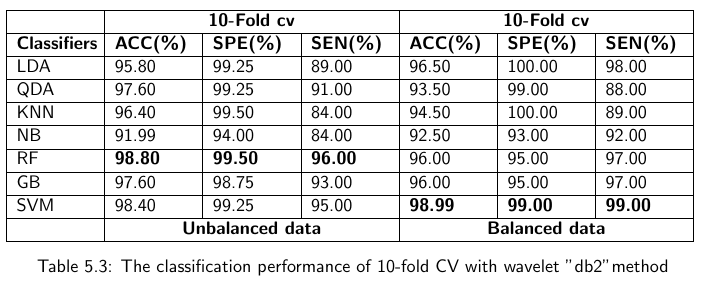

In [4]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/Table/db2.png',width=700)

RF performed best with 98.80% of accuracy, 99.50% of specificity and 96% of sensitivity in the unbalanced dataset when SVM performed best with 98.00% of accuracy, 99.00% of specificity and 99% of sensitivity in the balanced dataset

### 2.4.Results with features extraction by wavelet coif1

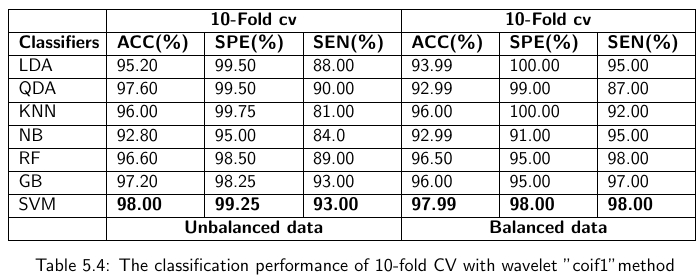

In [5]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/Table/coif1.png',width=700)

SVM performed best with 98.00% of accuracy, 99.25% of specificity and 93% of sensitivity in the unbalanced dataset and also in the balanced dataset with 97.99% of accuracy, 98.00% of specificity and 98% of sensitivity 

### 2.5.Results with features extraction by wavelet Mfcc

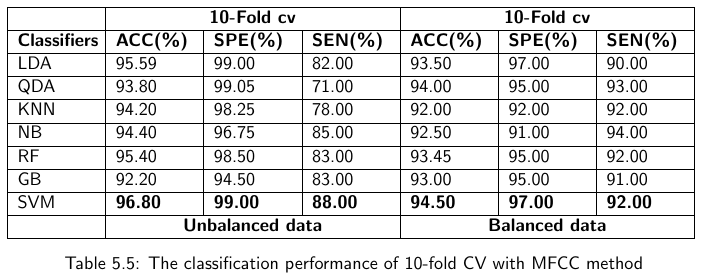

In [6]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/Table/mfcc.png',width=700)

SVM performed best with 96.80% of accuracy, 99.00% of specificity and 88% of sensitivity in the unbalanced dataset and also in the balanced dataset with 94.50% of accuracy, 97.00% of specificity and 92% of sensitivity 

## Part 3 : Comparison of Different Methods and Models in term of Accuracy using Boxplot

## 3.1.Case of a balanced dataset

**Step1: Importation of all the library**

In [1]:

#======== To navigate through folders and files as a whole ============ 
from os import chdir
from glob import glob

#======== for data analysis ==================
import pandas as pd
import numpy as np

#======== for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#======== for Anova Analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


**Step2: Importing and Putting all the dataframe together**

In [2]:
#=============================== path to the data in my computer ======================
txt_file_path = "/home/cyrillefeudjio/Documents/LDA and QDA/box_dat/imbalanced/final/"

#change to the folder of interest
chdir(txt_file_path)

#List all txt files in the working dir
list_1 = [file for file in glob('*.csv')]

# Names of differents features extraction techniques
list_2=['coif1','db2','Mfcc','wfe','db4']

**Step3: Merging and creation of one unique dataframe**

In [3]:
l=[]
for elt in list_2:
    for k in range (50):
        l.append(elt)
result = pd.concat([pd.read_csv(file).T for file in list_1],axis=1)
d=result.T
d=d*100
d['feat_extr']=l


In [5]:
d

,LDA,QDA,KNN,NB,RF,GB,SVM,feat_extr
0,96.0,100.0,96.0,94.0,96.0,96.0,100.0,coif1
1,96.0,96.0,94.0,88.0,94.0,98.0,94.0,coif1
2,90.0,96.0,94.0,92.0,94.0,96.0,98.0,coif1
3,98.0,98.0,100.0,98.0,98.0,100.0,98.0,coif1
4,96.0,98.0,94.0,92.0,98.0,98.0,100.0,coif1
...,...,...,...,...,...,...,...,...
45,96.0,100.0,98.0,96.0,100.0,100.0,100.0,db4
46,96.0,96.0,100.0,88.0,98.0,100.0,98.0,db4
47,96.0,96.0,96.0,92.0,96.0,96.0,100.0,db4
48,98.0,100.0,100.0,90.0,100.0,96.0,98.0,db4


**Step4: Visualization**

Text(0.5, 0, 'F_extraction')

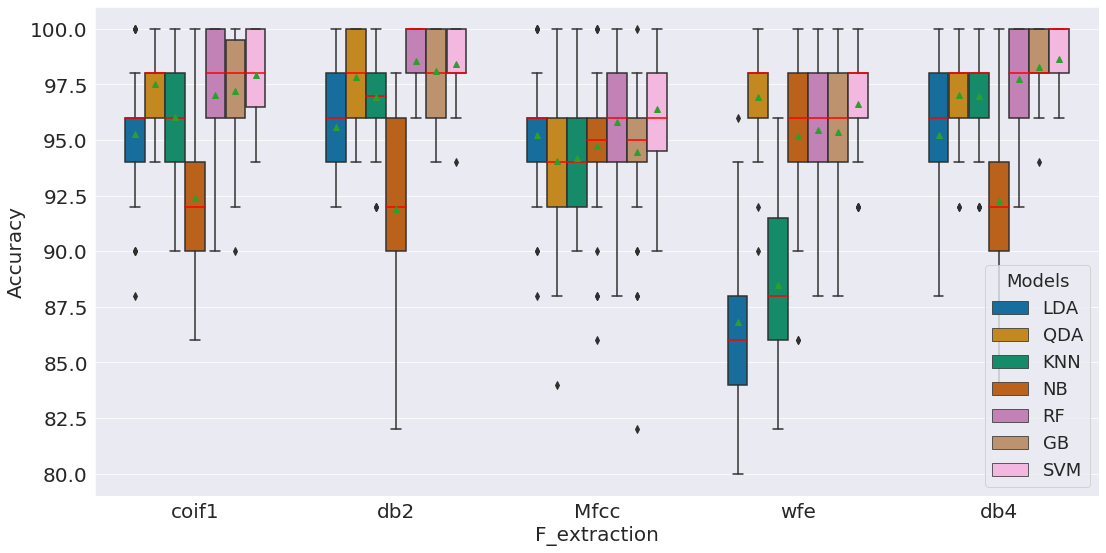

In [28]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d, id_vars=['feat_extr'], value_vars=['LDA', 'QDA', 'KNN','NB','RF','GB','SVM'])
# replace column names
d_melt.columns = ['feat_extr', 'Models', 'Accuracy']
# generate a boxplot to see the data distribution by feature extraction methods and models.
plt.figure(figsize=(18,9))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)
plt.rc('font', size=18)
sns.set_style("darkgrid")
sns.boxplot(x="feat_extr", y="Accuracy", hue="Models" ,data=d_melt, palette="colorblind",medianprops={'color':'red'},width=0.7,showmeans=True)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('F_extraction', fontsize=20)

In [24]:
sns.boxplot?

In [14]:

#=============================== path to save the data in my computer ======================
txt_file_path = "/home/cyrillefeudjio/Documents/LDA and QDA/Data_comparison"

#change to the folder of interest
chdir(txt_file_path)

#save the final data
d_melt.to_csv("Data_comp_b.csv", index=False, encoding="utf-8")

observing the graph and Tables above we can draw the conclusion below:


####  without features extraction:
   * the best models to use is Gradient boosting (GB) which here bring 96% of Accuracy 94% of sensitivity and 98% of specificity
   * LDA and KNN bring the smallest Accuracy and can be avoid when performe classification without features extraction
    

#### Among the features extraction method
   * wavelet db4 is the best methods and can be use with RF and SVM. however the best classifier among these classifiers is SVM which here bring 98.99% of Accuracy 99% of sensitivity and 99% of specificity
   * wavelet db2 associated to SVM challenge db4 and bring the same Accuracy,sensitivity and specificity
   * wavelet coif1 bring its best results when Associated to SVM and the results are 97.99% of Accuracy 98% of sensitivity and 98% of specificity
   * Mfcc perform less than all DWT used here but can bring its best results when associated to svm

### 1.1.Effect of features extractions methods and models on Accuracy

There are two factors to evaluate; **features extraction methods** and **models**. They have five and seven levels respectively. Therefore, two-way ANOVA is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of features extraction and models affects the Accuracy of classification. hence we can tests three hypotheses :
* **Effect of features extraction on Accuracy**
* **Effect of models on Accuracy** 
* **Effect of features extraction and models interactions on Accuracy**


### 1.2. ANOVA analysis

In [15]:
model = ols('Accuracy ~ C(feat_extr) + C(Models) + C(feat_extr):C(Models)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(feat_extr),2564.630857,4.0,93.478638,5.475372e-72
C(Models),4607.277714,6.0,111.954265,2.421974e-119
C(feat_extr):C(Models),4953.545143,24.0,30.092092,1.050274e-112
Residual,11762.960000,1715.0,NaN,NaN


**Interpretation**: The P-value obtained from ANOVA analysis for features extraction, models, and interaction are statistically significant (P<0.05). We conclude that the type of features extraction,the type of model, and interaction of both features extraction and models significantly affects the Accuracy of classification.


In [16]:
# Calculating effect size
def Anova_Table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

Anova_Table(anova_table)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(feat_extr),2564.630857,641.157714,4.0,93.478638,5.475372e-72,0.107359,0.106180
C(Models),4607.277714,767.879619,6.0,111.954265,2.421974e-119,0.192867,0.191089
C(feat_extr):C(Models),4953.545143,206.397714,24.0,30.092092,1.050274e-112,0.207362,0.200413
Residual,11762.960000,6.858869,1715.0,NaN,NaN,NaN,NaN


Now, we know that features extraction method and type of models are statistically significant, but ANOVA does not tell which features extraction method and type of models are significantly different from each other. To know the pairs of significant different features extraction method and type of models, we have to perform multiple pairwise comparison  analysis using Tukey HSD test.

### 2.3.pairwise comparison analysis using Tukey HSD test

In [17]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['feat_extr'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Mfcc  coif1   1.2171  0.001  0.4956  1.9387   True
  Mfcc    db2   1.7714  0.001  1.0499   2.493   True
  Mfcc    db4   1.6171  0.001  0.8956  2.3387   True
  Mfcc    wfe  -1.4457  0.001 -2.1673 -0.7241   True
 coif1    db2   0.5543 0.2215 -0.1673  1.2759  False
 coif1    db4      0.4 0.5464 -0.3216  1.1216  False
 coif1    wfe  -2.6629  0.001 -3.3844 -1.9413   True
   db2    db4  -0.1543    0.9 -0.8759  0.5673  False
   db2    wfe  -3.2171  0.001 -3.9387 -2.4956   True
   db4    wfe  -3.0629  0.001 -3.7844 -2.3413   True
----------------------------------------------------


Above results from Tukey HSD suggests that mfcc-db4, mfcc-wfe, coif1-wfe, db2-wfe and db4-wfe rejects null hypothesis and indicates statistical significant differences.

In [18]:
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['Models'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    GB    KNN   -2.152  0.001 -3.0301 -1.2739   True
    GB    LDA   -3.048  0.001 -3.9261 -2.1699   True
    GB     NB     -3.4  0.001 -4.2781 -2.5219   True
    GB    QDA   -0.008    0.9 -0.8861  0.8701  False
    GB     RF     0.24    0.9 -0.6381  1.1181  False
    GB    SVM    0.912 0.0358  0.0339  1.7901   True
   KNN    LDA   -0.896  0.042 -1.7741 -0.0179   True
   KNN     NB   -1.248  0.001 -2.1261 -0.3699   True
   KNN    QDA    2.144  0.001  1.2659  3.0221   True
   KNN     RF    2.392  0.001  1.5139  3.2701   True
   KNN    SVM    3.064  0.001  2.1859  3.9421   True
   LDA     NB   -0.352    0.9 -1.2301  0.5261  False
   LDA    QDA     3.04  0.001  2.1619  3.9181   True
   LDA     RF    3.288  0.001  2.4099  4.1661   True
   LDA    SVM     3.96  0.001  3.0819  4.8381   True
    NB    QDA    3.392  0.001  2.5139  4.2701 

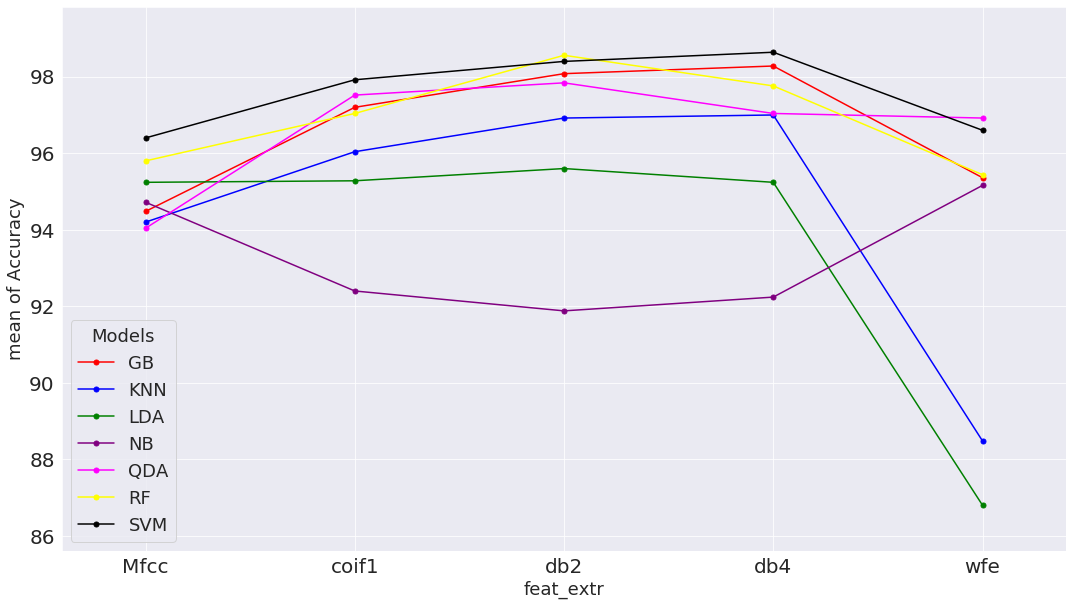

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(18, 10))
fig = interaction_plot(x=d_melt['feat_extr'], trace=d_melt['Models'], response=d_melt['Accuracy'],
                       colors=['red', 'blue','green','purple','magenta','yellow','black'], ms=10, ax=ax)

### One way anova for QDA

In [16]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
d=pd.read_csv(list_1[3])
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['LDA', 'QDA', 'KNN','NB','RF','GB','SVM'])
# replace column names
d_melt.columns = ['index', 'Models', 'Accuracy']
# Ordinary Least Squares (OLS) model
model = ols('Accuracy ~ C(Models)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Models),0.506830,6.0,90.184533,1.694938e-67
Residual,0.321272,343.0,NaN,NaN


In [17]:
# Calculating effect size
def Anova_Table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

Anova_Table(anova_table)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(Models),0.506830,0.084472,6.0,90.184533,1.694938e-67,0.612038,0.604568
Residual,0.321272,0.000937,343.0,NaN,NaN,NaN,NaN


In [18]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['Models'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    GB    KNN  -0.0688  0.001  -0.087 -0.0506   True
    GB    LDA  -0.0856  0.001 -0.1038 -0.0674   True
    GB     NB   -0.002    0.9 -0.0202  0.0162  False
    GB    QDA   0.0156 0.1454 -0.0026  0.0338  False
    GB     RF   0.0008    0.9 -0.0174   0.019  False
    GB    SVM   0.0124 0.4022 -0.0058  0.0306  False
   KNN    LDA  -0.0168 0.0903  -0.035  0.0014  False
   KNN     NB   0.0668  0.001  0.0486   0.085   True
   KNN    QDA   0.0844  0.001  0.0662  0.1026   True
   KNN     RF   0.0696  0.001  0.0514  0.0878   True
   KNN    SVM   0.0812  0.001   0.063  0.0994   True
   LDA     NB   0.0836  0.001  0.0654  0.1018   True
   LDA    QDA   0.1012  0.001   0.083  0.1194   True
   LDA     RF   0.0864  0.001  0.0682  0.1046   True
   LDA    SVM    0.098  0.001  0.0798  0.1162   True
    NB    QDA   0.0176 0.0644 -0.0006  0.0358 

## 2.Case of Imbalanced dataset

**Importing and Putting all the dataframe together**

In [53]:
#=============================== path to the data in my computer ======================
txt_file_path_2 = "/home/cyrillefeudjio/Documents/LDA and QDA/box_dat/Balanced/final/"

#change to the folder of interest
chdir(txt_file_path_2)

#List all txt files in the working dir
list_11 = [file for file in glob('*.csv')]

# Names of differents features extraction techniques
list_22=['coif1','db2','mfcc','wfe','db4']

**Merging and creation of one unique dataframe**

In [54]:
l=[]
for elt in list_22:
    for k in range (50):
        l.append(elt)
result = pd.concat([pd.read_csv(file).T for file in list_11],axis=1)
d=result.T
d=d*100
d['feat_extr']=l

**Visualization**

Text(0.5, 0, 'F_extraction')

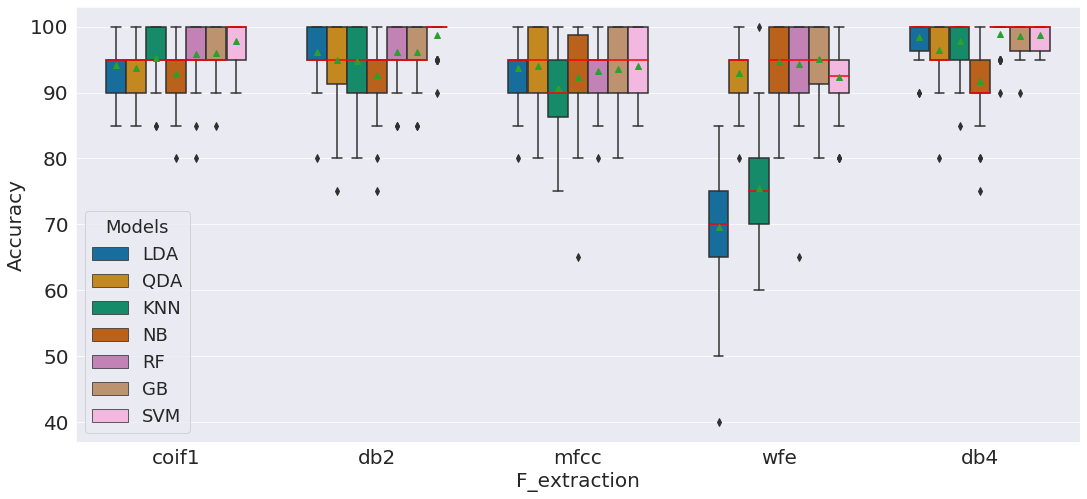

In [55]:
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d, id_vars=['feat_extr'], value_vars=['LDA', 'QDA', 'KNN','NB','RF','GB','SVM'])
# replace column names
d_melt.columns = ['feat_extr', 'Models', 'Accuracy']
# generate a boxplot to see the data distribution by feature extraction methods and models. Using boxplot, we can easily detect the 
# differences between different groups
plt.figure(figsize=(18,8))
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)
plt.rc('font', size=18)
sns.set_style("darkgrid")
sns.boxplot(x="feat_extr", y="Accuracy", hue="Models", data=d_melt, palette="colorblind",medianprops={'color':'red'},width=0.7,showmeans=True)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('F_extraction', fontsize=20)

In [57]:

#=============================== path to save the data in my computer ======================
txt_file_path = "/home/cyrillefeudjio/Documents/LDA and QDA/Data_comparison"

#change to the folder of interest
chdir(txt_file_path)

#save the final data
d_melt.to_csv("Data_comp_I.csv", index=False, encoding="utf-8")


Observing the graph and Tables above we can draw the conclusion below:


####  Without features extraction:
   * the best models to use is QDA which here bring 96.8% of Accuracy 99.75% of sensitivity and 85% of specificity
   * LDA and KNN bring the smallest Accuracy and can be avoid when performe classification without features extraction
    

#### Among the features extraction method
   * wavelet db4 is the best methods when use with SVM which here bring 98.79% of Accuracy 99% of specificity and 98% of sensitivity 
   * wavelet db2 associated to RF can challenge db4 and bring 98.80% of Accuracy 99.50% of specificity and 96% of sensitivity 
   * wavelet coif1 bring its best results when Associated to SVM and the results are 98.00% of Accuracy 99.25% of specificity and 93% of sensitivity 
   * Mfcc perform less than all DWT used here but can bring its best results when associated to svm

### 2.1.Effect of features extractions methods and models on Accuracy

There are two factors to evaluate; **features extraction methods** and **models**. They have five and seven levels respectively. Therefore, two-way ANOVA is suitable for analysis. Here, using two-way ANOVA, we can simultaneously evaluate how type of features extraction and models affects the Accuracy of classification. hence we can tests three hypotheses :
* **Effect of features extraction on Accuracy**
* **Effect of models on Accuracy** 
* **Effect of features extraction and models interactions on Accuracy**


### 2.2. ANOVA analysis

In [22]:
model = ols('Accuracy ~ C(feat_extr) + C(Models) + C(feat_extr):C(Models)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(feat_extr),18879.485714,4.0,190.225709,4.757747e-135
C(Models),8947.342857,6.0,60.101024,9.577189e-68
C(feat_extr):C(Models),28916.514286,24.0,48.559448,1.907697e-173
Residual,42552.500000,1715.0,NaN,NaN


**Interpretation**: The P-value obtained from ANOVA analysis for features extraction, models, and interaction are statistically significant (P<0.05). We conclude that the type of features extraction, the type of model and, interaction of both feature extraction and models significantly affects the Accuracy of classification.

Each factor has an independent significant effect on the classification accuracy. While it is good to know if there is a statistically significant effect of some models or feature extraction techniques on accuracy, it is as important to know the size of the effect they have on the outcome. To see this, we can calculate the effect size which is estimated by the measures of eta-squared and omega-squared.

In [23]:
# Calculating effect size
def Anova_Table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

Anova_Table(anova_table)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(feat_extr),18879.485714,4719.871429,4.0,190.225709,4.757747e-135,0.190134,0.189087
C(Models),8947.342857,1491.223810,6.0,60.101024,9.577189e-68,0.090108,0.088587
C(feat_extr):C(Models),28916.514286,1204.854762,24.0,48.559448,1.907697e-173,0.291216,0.285147
Residual,42552.500000,24.811953,1715.0,NaN,NaN,NaN,NaN


Now, we know that features extraction method and type of models are statistically significant, but ANOVA does not tell which features extraction method and type of models are significantly different from each other. To know the pairs of significant different features extraction method and type of models, we have to perform multiple pairwise comparison  analysis using Tukey HSD test.

### 2.3.pairwise comparison analysis using Tukey HSD test

In [24]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['feat_extr'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 coif1    db2   0.5571 0.7892 -0.8441  1.9584  False
 coif1    db4   2.1571  0.001  0.7559  3.5584   True
 coif1   mfcc  -2.0143  0.001 -3.4155  -0.613   True
 coif1    wfe  -7.3286  0.001 -8.7298 -5.9273   True
   db2    db4      1.6 0.0159  0.1987  3.0013   True
   db2   mfcc  -2.5714  0.001 -3.9727 -1.1702   True
   db2    wfe  -7.8857  0.001  -9.287 -6.4845   True
   db4   mfcc  -4.1714  0.001 -5.5727 -2.7702   True
   db4    wfe  -9.4857  0.001 -10.887 -8.0845   True
  mfcc    wfe  -5.3143  0.001 -6.7155  -3.913   True
----------------------------------------------------


Above results from Tukey HSD suggests that coif1-wfe, db2-mfcc, db2-wfe, db4-mfcc and db4-wfe rejects null hypothesis and indicates statistical significant differences.

In [25]:
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['Models'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    GB    KNN    -5.04  0.001 -6.9408 -3.1392   True
    GB    LDA    -5.46  0.001 -7.3608 -3.5592   True
    GB     NB    -3.02  0.001 -4.9208 -1.1192   True
    GB    QDA     -1.5 0.2305 -3.4008  0.4008  False
    GB     RF    -0.18    0.9 -2.0808  1.7208  False
    GB    SVM     0.46    0.9 -1.4408  2.3608  False
   KNN    LDA    -0.42    0.9 -2.3208  1.4808  False
   KNN     NB     2.02 0.0288  0.1192  3.9208   True
   KNN    QDA     3.54  0.001  1.6392  5.4408   True
   KNN     RF     4.86  0.001  2.9592  6.7608   True
   KNN    SVM      5.5  0.001  3.5992  7.4008   True
   LDA     NB     2.44  0.003  0.5392  4.3408   True
   LDA    QDA     3.96  0.001  2.0592  5.8608   True
   LDA     RF     5.28  0.001  3.3792  7.1808   True
   LDA    SVM     5.92  0.001  4.0192  7.8208   True
    NB    QDA     1.52 0.2163 -0.3808  3.4208 

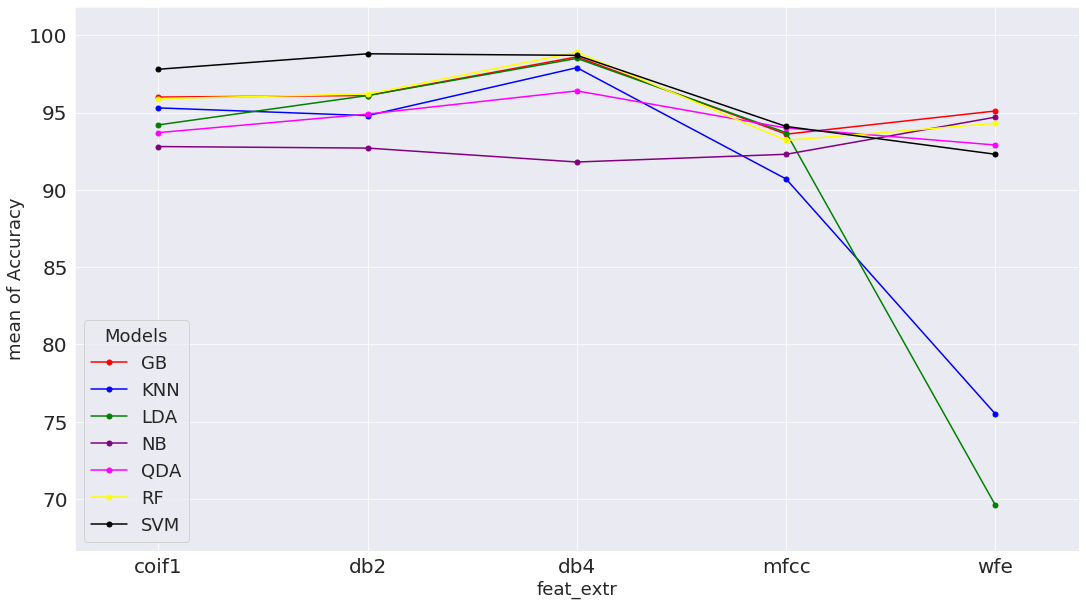

In [26]:
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(18, 10))
fig = interaction_plot(x=d_melt['feat_extr'], trace=d_melt['Models'], response=d_melt['Accuracy'],
                       colors=['red', 'blue','green','purple','magenta','yellow','black'], ms=10, ax=ax)



### One way anova for GB

In [27]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
d=pd.read_csv(list_1[3])
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['LDA', 'QDA', 'KNN','NB','RF','GB','SVM'])
# replace column names
d_melt.columns = ['index', 'Models', 'Accuracy']
# Ordinary Least Squares (OLS) model
model = ols('Accuracy ~ C(Models)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Models),3.359671,6.0,134.638077,5.121986e-87
Residual,1.426500,343.0,NaN,NaN


In [28]:
# Calculating effect size
def Anova_Table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'mean_sq', 'df', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

Anova_Table(anova_table)

,sum_sq,mean_sq,df,F,PR(>F),eta_sq,omega_sq
C(Models),3.359671,0.559945,6.0,134.638077,5.121986e-87,0.701954,0.696135
Residual,1.426500,0.004159,343.0,NaN,NaN,NaN,NaN


In [29]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['Accuracy'], groups=d_melt['Models'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    GB    KNN   -0.196  0.001 -0.2343 -0.1577   True
    GB    LDA   -0.255  0.001 -0.2933 -0.2167   True
    GB     NB   -0.004    0.9 -0.0423  0.0343  False
    GB    QDA   -0.022 0.5971 -0.0603  0.0163  False
    GB     RF   -0.008    0.9 -0.0463  0.0303  False
    GB    SVM   -0.028 0.3141 -0.0663  0.0103  False
   KNN    LDA   -0.059  0.001 -0.0973 -0.0207   True
   KNN     NB    0.192  0.001  0.1537  0.2303   True
   KNN    QDA    0.174  0.001  0.1357  0.2123   True
   KNN     RF    0.188  0.001  0.1497  0.2263   True
   KNN    SVM    0.168  0.001  0.1297  0.2063   True
   LDA     NB    0.251  0.001  0.2127  0.2893   True
   LDA    QDA    0.233  0.001  0.1947  0.2713   True
   LDA     RF    0.247  0.001  0.2087  0.2853   True
   LDA    SVM    0.227  0.001  0.1887  0.2653   True
    NB    QDA   -0.018 0.7784 -0.0563  0.0203 

## 3.Conclusion and recommandation

* The combination between **wavelet Db4** or **wavelet Db2** and **suport vector machine** can be use to acheive the best accuracy when performed **Binary classification** in the **balanced dataset**

* The combination between **wavelet Db4 and suport vector machine** or **wavelet Db2 and Random Forest** can be use to acheive the best accuracy when performed **Binary classification** in the **unbalanced dataset**